To check what attributes are available in any scikit-learn or seaborn, 
use dir(dataset_name):

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


Load the dataset.
Use sklearn.datasets to import the Iris dataset. It contains 150 flowers, each described by 4 features.
Each of the 150 flowers belong to one of the 3 categories/species, which are stored in the target label y.

As output, print all feature names from the dataset, and print all names- the 3 flower species,
aslo show the first 5 rows of x- features and y- labels.


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data      # shape (150, 4)
y = iris.target    # shape (150,)
print(iris.feature_names, iris.target_names)

print("First 5 feature rows:", X[:5])
print("First 5 labels:", y[:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
First 5 feature rows: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 labels: [0 0 0 0 0]


The following code shows numerical labels assigned to the species, called label mapping.

In [4]:
print("\nLabel mapping:")
for i, name in enumerate(iris.target_names):
    print(f"{i} → {name}")



Label mapping:
0 → setosa
1 → versicolor
2 → virginica


1. split the dataset into training set and test set, 80% and 20%
2. model.fit, here model lerans relationship between features and labels on the 80%
3. test the model by asking to predict the label/species of the 20% test set
4. print the actual labels for test set
5. print the prediction for the test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully!")
y_pred = model.predict(X_test)

print("Actual:   ", y_test[:10])   # first 10 true labels

print("Predicted:", y_pred[:10])   # first 10 predictions


Model trained successfully!
Actual:    [1 0 2 1 1 0 1 2 1 1]
Predicted: [1 0 2 1 1 0 1 2 1 1]


To make result easier to interpret, convert the numerical labels into the corresponding species names

In [6]:
actual_names = iris.target_names[y_test[:10]]
predicted_names = iris.target_names[y_pred[:10]]

print("Actual:   ", actual_names)
print("Predicted:", predicted_names)


Actual:    ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
Predicted: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


Calculating accuracy
Training accuracy is measured on the 80% training set, showing how well the model learned from the data
Test accuracy is measured on the remaining 20% test set, showing how well the model performs on unseen data

In [7]:
print("Training accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))



Training accuracy: 1.0
Test accuracy: 1.0


Another way to evaluate performance is using built-in sklearn.metrics, such as accoracy_score
This compares the predictions with the true labels from the test set, and returns the percentage of the correct classifications

In [8]:
from sklearn.metrics import accuracy_score

print("Accuracy (test set):", accuracy_score(y_test, y_pred))

Accuracy (test set): 1.0


Confusion matrix is used to evaluate the model's predictions, by comapring y_pred and y_test, the predicted labels with the true labels
This matrix is ecalcualted on the test set (20%)
Here 3 species, there fore a 3x3 matrix is expected
The diagonal line represents the correct predictions for each species, 
while the off-diagonal represents the misclassifications, where the model confused a species with another.

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


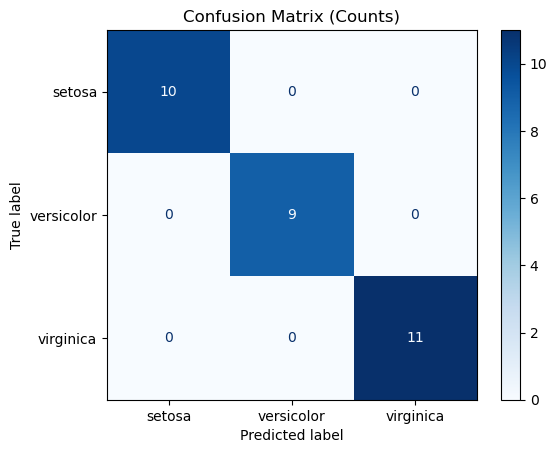

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# generate predictions
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

disp_counts = ConfusionMatrixDisplay(confusion_matrix=cm,
                                     display_labels=iris.target_names)
disp_counts.plot(cmap="Blues", values_format="d")  # "d" = integer format
plt.title("Confusion Matrix (Counts)") # title for the matrix
plt.show()

Can calculate % instead of counts
format is set 2f, because decimals are the standard mathematical way of representing proportions across datasets and models

Axis labeling x-axis : Predicted label,  y-axis  True label
These are set automatically by scikit-learn

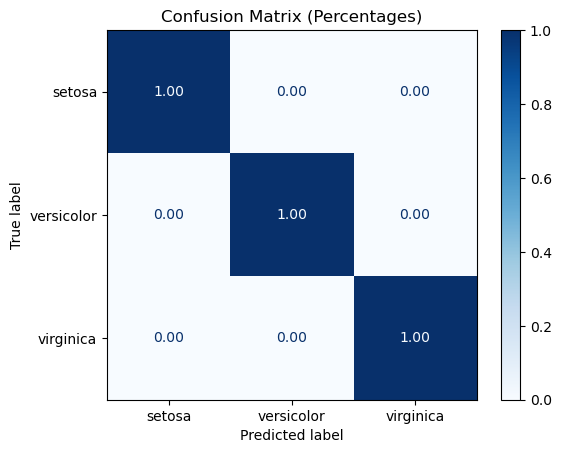

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)


cm_percent = confusion_matrix(y_test, y_pred, normalize='true')

disp_percent = ConfusionMatrixDisplay(confusion_matrix=cm_percent,
                                      display_labels=iris.target_names)
disp_percent.plot(cmap="Blues", values_format=".2f")  # ".2f" = 2 decimal places
plt.title("Confusion Matrix (Percentages)")
plt.show()

Support vector machine
Calculates training accuracy, how well the model learned the data it saw
Test accuracy, how well it generalises to unseen data

the meaning of the possible results:
If training accuracy = 1.0 (100%) but test accuracy is much lower, model memorised the training data instead of learning general rules (overfitting).
If both accuracies are low, the model didn’t learn patterns well (underfitting).
If both are high and close then the model generalises well (good balance).

In [14]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
print("SVM - Train accuracy:", svm_model.score(X_train, y_train))
print("SVM - Test accuracy:", svm_model.score(X_test, y_test))

SVM - Train accuracy: 0.975
SVM - Test accuracy: 1.0


This indicates that the model generalised extremely well to unseen data and did not show signs of overfitting

k-Nearest Neighbours
This model classifies a test sample by looking at the k closest training samples
n_neighbors=5, meaning the model finds the 5 nearest flowers in the training set 
and assigns the test flower the majority label among those neighbours

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

print("k-NN - Train accuracy:", knn_model.score(X_train, y_train))
print("k-NN - Test accuracy:", knn_model.score(X_test, y_test))

k-NN - Train accuracy: 0.9666666666666667
k-NN - Test accuracy: 1.0


The k-NN and SVM models achieved slightly higher accuracy on the test set than on the training set. This is possible because the Iris dataset is small and very clean, so the 20% test split may have contained easier-to-classify samples than the larger, more varied training set

Visualisation of the dataset
The scatter plot shows the relationship between petal length and petal width for each flower species
It helps to understand the data, and shows that the dataset is easy to classify as the species have distinct petal characteristics

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9


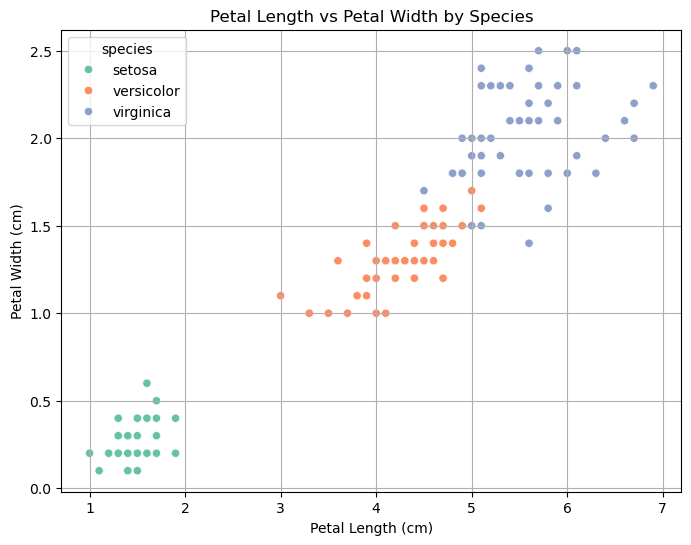

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Display summary statistics grouped by species
print(iris.groupby('species')['petal_length'].describe())

# Scatter plot: Petal Length vs Petal Width, colored by species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='Set2') 
plt.title('Petal Length vs Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid(True)
plt.show()